In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from PSyn import matrix_functions
from PSyn import brain
import os
import time
SOURCE_DATA_PATH = 'data/task1/dev/'
from collections import Counter

In [48]:
source_files = os.listdir(SOURCE_DATA_PATH)
source = 'polish-train-high'
# source_files = ['polish-train-medium']

start = time.time()
# for source in source_files:
print(source)
prf, total_corect, global_attr, total_entries, correct_inflections, macro_prf = brain.test_model_accuracy(source, classifier='decision_tree')
# print(time.time() - start)
start = time.time()
print('Macro PRF:', )
print('Guessed %d inflections correctly out of %d.\nAccuracy: %f' % (total_corect, total_entries, (total_corect * 100 / float(total_entries))))

polish-train-high
Total Alphabets:
{'C', 'm', 'ń', 'i', 't', 'b', 'd', 'y', 'n', 'ś', 'a', 'G', 'w', 'e', 'ć', 'z', 'j', 'k', 'M', 'R', 'u', 's', 'B', 'o', 'h', 'ę', 'l', 'ą', 'W', ' ', 'ł', 'ż', 'Ż', 'c', 'g', 'ź', 'ó', 'p', 'f', 'r'}
Epsilon: 9.000000
Ci: 40.000000


/home/gaurav/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/gaurav/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gaurav/python-scripts/py/scripts/pg_project/BTP-ProgSyn/program_synthesis/PSyn/brain.py:389: RuntimeWarning: divide by zero encountered in true_divide
  pP = float(tP) / (tP + fP)
/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ones and zeros 617 100423
Macro PRF:
Guessed 44 inflections correctly out of 421.
Accuracy: 10.451306


In [36]:
source_files = os.listdir(SOURCE_DATA_PATH)
source = 'polish-train-high'
# source_files = ['polish-train-medium']

start = time.time()
# for source in source_files:
print(source)
prf, total_corect, global_attr, total_entries, correct_inflections, macro_prf = brain.test_model_accuracy(source, classifier='random_forest')
# print(time.time() - start)
start = time.time()
print('Macro PRF:', )
print('Guessed %d inflections correctly out of %d.\nAccuracy: %f' % (total_corect, total_entries, (total_corect * 100 / float(total_entries))))

polish-train-high
Total Alphabets:
{'C', 'm', 'ń', 'i', 't', 'b', 'd', 'y', 'n', 'ś', 'a', 'G', 'w', 'e', 'ć', 'z', 'j', 'k', 'M', 'R', 'u', 's', 'B', 'o', 'h', 'ę', 'l', 'ą', 'W', ' ', 'ł', 'ż', 'Ż', 'c', 'g', 'ź', 'ó', 'p', 'f', 'r'}
Epsilon: 9.000000
Ci: 40.000000


/home/gaurav/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/gaurav/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gaurav/python-scripts/py/scripts/pg_project/BTP-ProgSyn/program_synthesis/PSyn/brain.py:389: RuntimeWarning: divide by zero encountered in true_divide
  pP = float(tP) / (tP + fP)
/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ones and zeros 1041 167359
Macro PRF:
Guessed 4 inflections correctly out of 421.
Accuracy: 0.950119


In [ ]:
global_attr

In [3]:
source_csv = open('data/task1/dev/polish-dev', 'r')
dict_for_df = {'source': [], 'target': [], 'source_node': [], 'pos': []}
content = source_csv.readlines()
for line in content:
    row = line.split('\t')
    dict_for_df['source'].append(row[0])
    dict_for_df['target'].append(row[1])
    dict_for_df['source_node'].append(
        row[0] + '-' + row[2].strip().replace(';', '_'))
    dict_for_df['pos'].append(row[2].split(';')[0])
source_df = pd.DataFrame.from_records(dict_for_df)
source_df = source_df[source_df['pos'] == 'N']
idx = source_df.index[source_df['source_node'] == 'Cezar-N_DAT_PL']
list(source_df.loc[idx]['target'])

['Cezarom']

In [4]:
o = pd.DataFrame.from_dict(correct_inflections)
ops_ = {}
for key in o.columns.values:
    ops_[key] = []
    for i, _ in enumerate(o[key]):
        if _:
            ops_[key].append(o[key].index.values[i])
t = []
for s_node in list(ops_.keys()):
    idx = source_df.index[source_df['source_node'] == s_node]
    t.append(list(source_df.loc[idx]['target'])[0])
pd.DataFrame.from_dict({'source': list(ops_.keys()), 'opn_sequence': list(ops_.values()), 'target': t})

,opn_sequence,source,target
0,"[ins_m_7_1, ins_o_6_0]",Cezar-N_DAT_PL,Cezarom
1,"[del_n_9_-1, ins_e_9_-1]",Marsjanin-N_VOC_PL,Marsjanie
2,[ins_a_10_0],Rzymianin-N_GEN_SG,Rzymianina
3,"[ins_c_9_0, ins_h_10_1]",Węgierka-N_ESS_PL,Węgierkach
4,"[del_o_8_-1, del_ł_7_-2, ins_e_8_-1, ins_l_7_-2]",abecadło-N_ESS_SG,abecadle
5,"[ins_m_12_1, ins_o_11_0]",abiturient-N_DAT_PL,abiturientom
6,"[ins_w_8_1, ins_ó_7_0]",absurd-N_GEN_PL,absurdów
7,"[ins_e_7_0, ins_m_8_1]",aceton-N_INS_SG,acetonem
8,[ins_y_7_0],adwent-N_VOC_PL,adwenty
9,"[ins_i_10_-5, ins_o_8_-7, ins_w_9_-6]",adwokat diabła-N_DAT_SG,adwokatowi diabła


In [5]:
prf_values = list(prf.values())
prf_keys = list(prf.keys())
prf_df = pd.DataFrame.from_dict({'operation': [_.split('_')[0] for _ in prf_keys],
                                 'char': [_.split('_')[1] for _ in prf_keys],
                                 'lpos': [_.split('_')[2] for _ in prf_keys],
                                 'rpos': [_.split('_')[3] for _ in prf_keys],
                                 'precision': [_[0] for _ in prf_values],
                                 'recall': [_[1] for _ in prf_values],
                                 'f_score': [_[2] for _ in prf_values]})
display(prf_df.head())
P = [ e[0] for e in list(prf.values())]
R = [ e[1] for e in list(prf.values())]
F = [ e[2] for e in list(prf.values())]
print(np.mean(P), np.mean(R), np.mean(F))

,char,f_score,lpos,operation,precision,recall,rpos
0,a,0.485958,10,del,0.483010,0.488943,-1
1,a,0.490931,11,del,0.495122,0.486811,-1
2,a,0.492771,12,del,0.492771,0.492771,-1
3,a,0.498810,13,del,0.498810,0.498810,-1
4,a,0.498810,14,del,0.497625,0.500000,-1


0.495510492251 0.496102987894 0.495677737534


Model-wise boxplots for full-length bitstrings


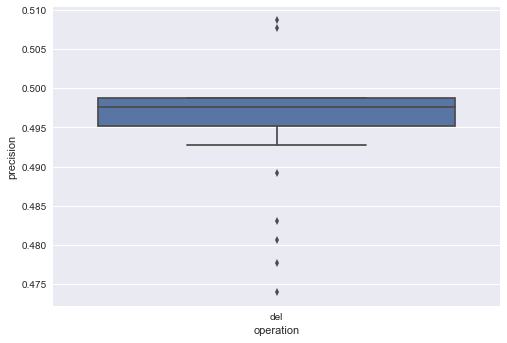

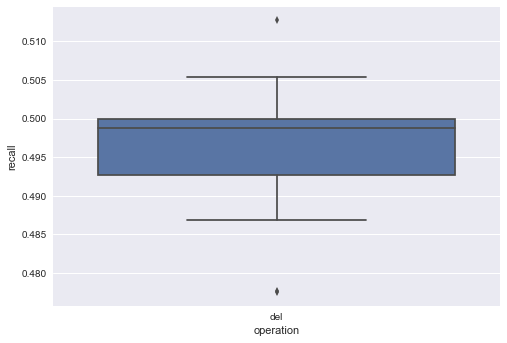

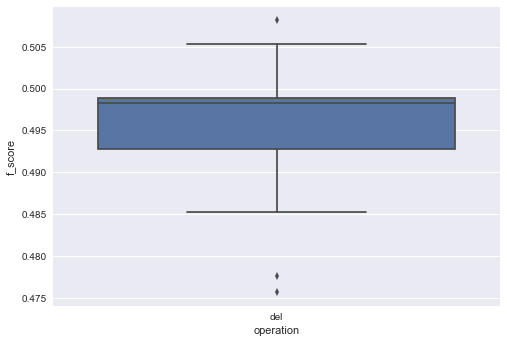

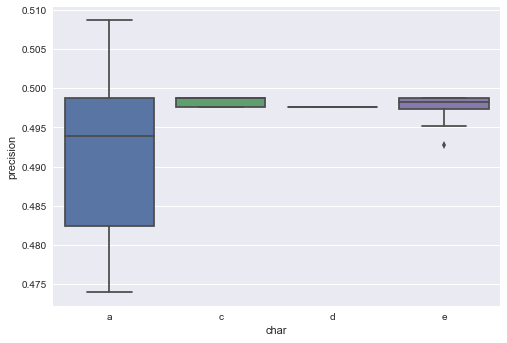

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
print('Model-wise boxplots for full-length bitstrings')
plt.clf()
box_plot = sns.boxplot(x='operation', y='precision', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='operation', y='recall', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='operation', y='f_score', data=prf_df)
display(box_plot.get_figure())
plt.clf()
box_plot = sns.boxplot(x='char', y='precision', data=prf_df)
display(box_plot.get_figure())

In [10]:
# Load graphs of classifiers
import pickle
import os
from sklearn import tree
LABELS_PATH = 'data/task1/output/labels/'
labels = pickle.load(open(LABELS_PATH + 'polish-train-high.p', 'rb'))
clf_path = 'data/task1/output/prediction/polish-train-high/'
features = pickle.load(open('feature_map_polish.p', 'rb')).keys()
dtrees = [pickle.load(open(clf_path + clf, 'rb')) for clf in os.listdir(clf_path)]
for i, t in enumerate(os.listdir(clf_path)):
    if 'decision_tree.p' not in t:
        continue
    tree.export_graphviz(dtrees[i], out_file='dotfiles/' + t.replace('.p', '.dot'), feature_names=list(features))

In [11]:
from subprocess import check_call
for dot_f in os.listdir('dotfiles/'):
    check_call(['dot','-Tpng',('dotfiles/' + dot_f),'-o','pngs/' + dot_f.replace('.dot', '.png')])

In [19]:
for i, t in enumerate(os.listdir(clf_path)):
    if 'decision_tree.p' in t:
        continue
    feature_importances = dtrees[i].feature_importances_
    
    

0.0996104810069
0.0991209946137
0.0997669361602
0.0155093340273
0.099355280601
0.0631997766299
0.0643425665645
0.0928981846882
0.0964498769017
0.0993542389026
0.0324142064794
0.0974574254733
0.0972437030491
0.197815792141
0.0751258737064
0.0988942655744
0.0963175725438
0.0353290161893
0.1
0.0181340646844
0.0968602273445
0.105724509409
0.0996251814911
0.0990117703772
0.0150776513845
0.0874078841513
0.088108127356
0.0572102156844
0.133362792753
0.0505979379987
0.0992811901606
0.049262277526
0.0995928151889
0.0962689461065
0.0996771907904
0.023921622781
0.099450464777
0.0287026356209
0.0985066082835
0.0131869693596
0.0979814319075
0.0950209898365
0.0652109256835
0.0243063744798
0.1
0.0296405183693
0.0969659158521
0.099816710387
0.0706361108931
0.100505479562
0.0992282684174
0.0994843413682
0.0682734478224
0.0489650919521
0.0955178442247
0.0701023102108
0.0103392210024
0.0989107379585
0.0982017233142
0.0967955753852
0.0857332239126
0.0304513425586
0.0131363277976
0.0988703012882
0.1
0.0944